# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                    'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                    'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


All data is non-null but there is a lot of categorical information

In [5]:
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Good strategy when dealing with this much categorical data is to split them up into arrays of columns so we can
easily index the dataframe for only the type of data we need

In [6]:
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [7]:
adult_df[categoricals].describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [8]:
adult_df[numericals].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


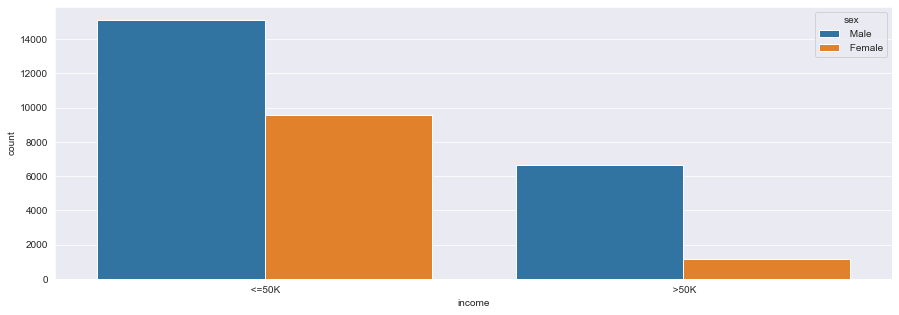

In [9]:
sns.countplot(x=adult_df['income'], hue='sex', data=adult_df)
plt.show()

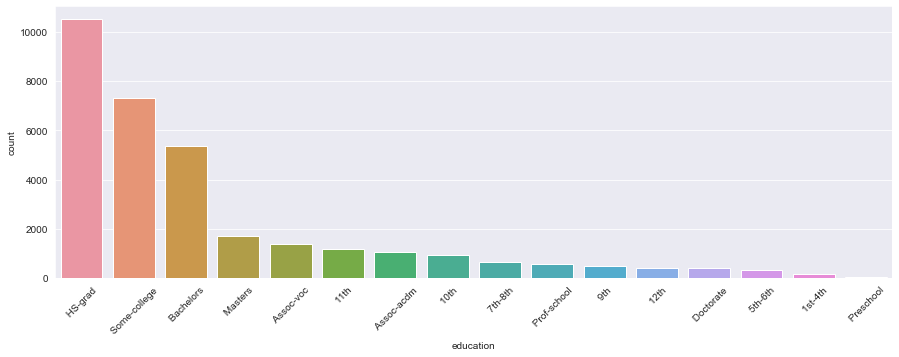

In [10]:
# order= is an optional parameter, which is just sorting the bars in this case.
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

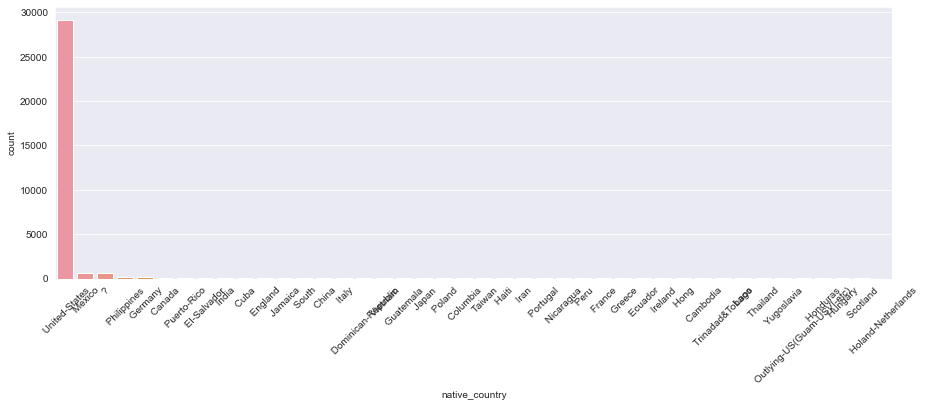

In [11]:
sns.countplot(x=adult_df['native_country'], order=adult_df['native_country'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

The data is overwhelmingly from the United States

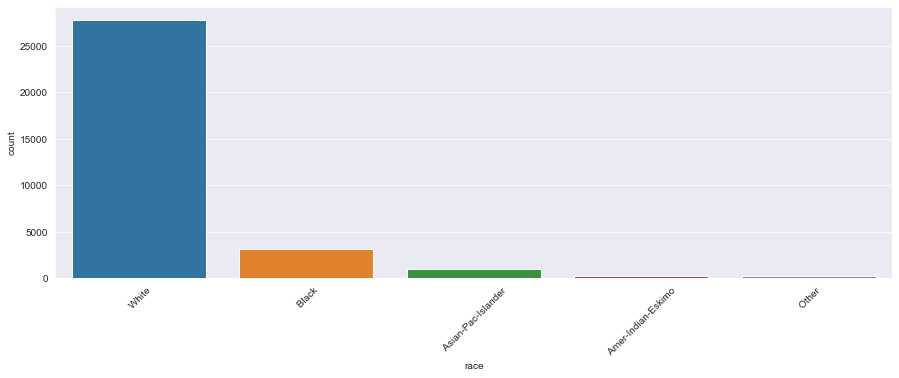

In [12]:
sns.countplot(x=adult_df['race'], order=adult_df['race'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

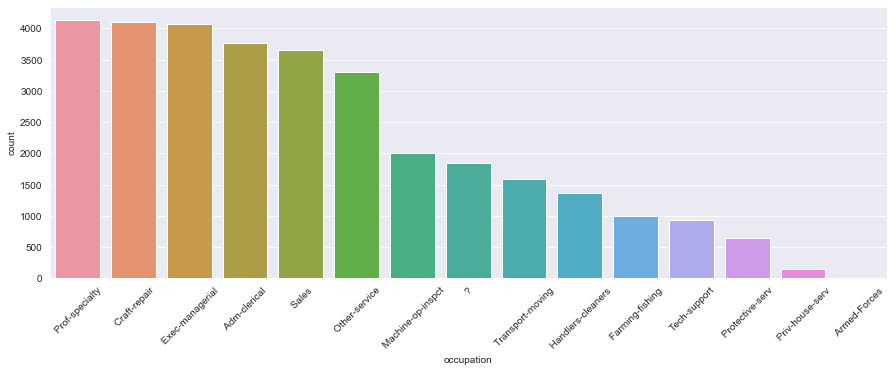

In [13]:
sns.countplot(x=adult_df['occupation'], order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

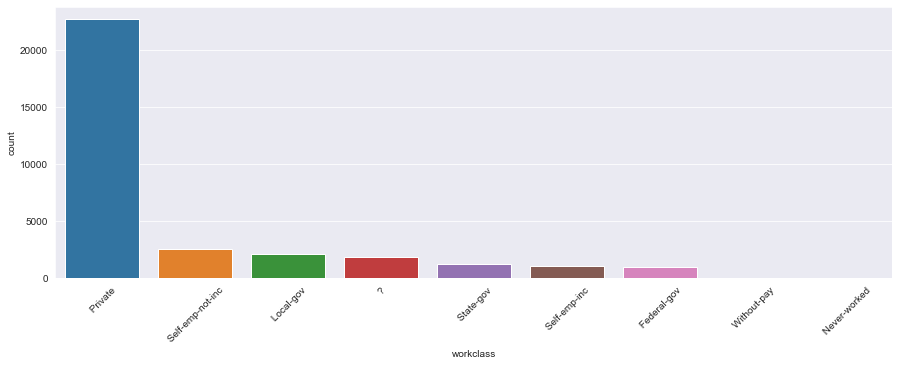

In [14]:
sns.countplot(x=adult_df['workclass'], order=adult_df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

Overall this dataset seems to be rather biased towards certain groups, namely white males from the united states who make up the majority of the data, other categories are under represented

In [15]:
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

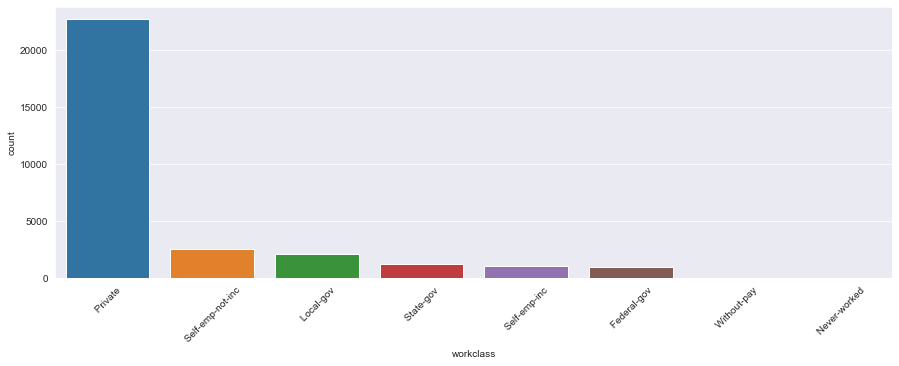

In [16]:
sns.countplot(x=adult_df['workclass'], order=adult_df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

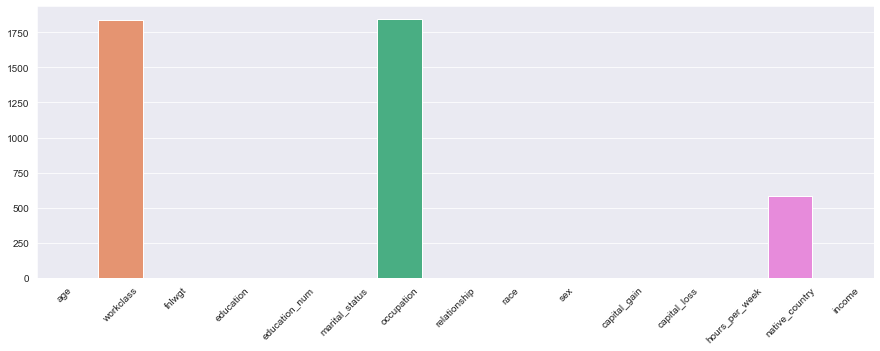

In [17]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [18]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [19]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

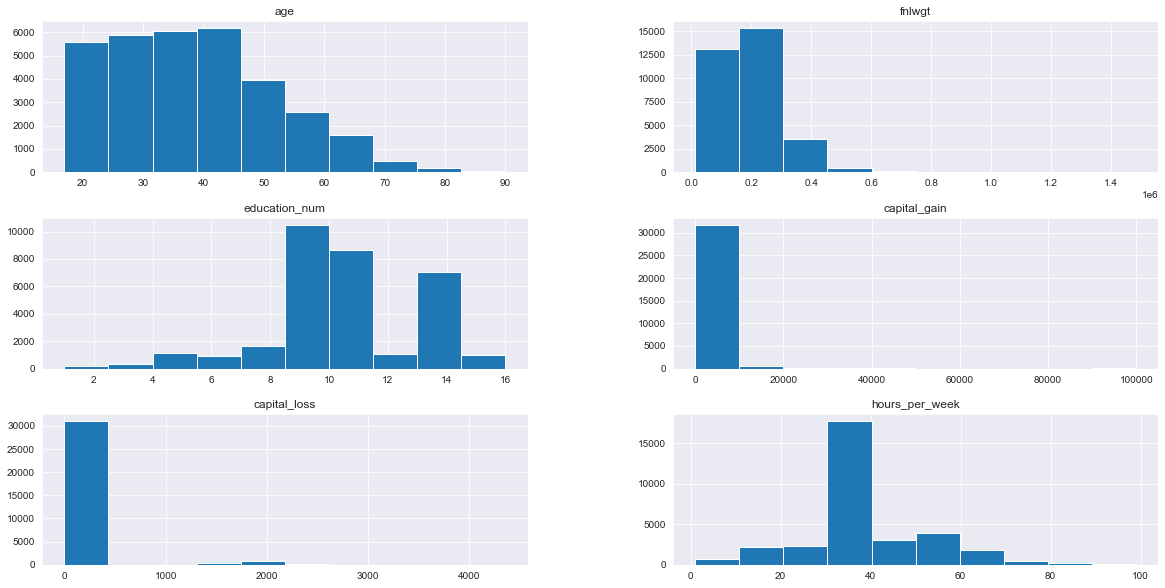

In [20]:
adult_df[numericals].hist(figsize=(20, 10))
plt.show()

In [21]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)
#using a naive mode fill to take care of the null values from the ? entries

In [22]:
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import RobustScaler

# all columns except our target column for X
X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']

# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X_scaled = scaler.fit_transform(X[numericals])
# reassign X[numericals] to the transformed numerical data.
X[numericals] = X_scaled

In [24]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


These values have now been scaled similar to the knn section however using the robustscalar method instead

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = gnb.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8165


In [29]:
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8234
Test set score: 0.8165


Testing and training values are very close to each other so the model is not overfit

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6202 1178]
 [ 615 1774]]

True Positives(TP) =  6202

True Negatives(TN) =  1774

False Positives(FP) =  1178

False Negatives(FN) =  615


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      7380
           1       0.60      0.74      0.66      2389

    accuracy                           0.82      9769
   macro avg       0.76      0.79      0.77      9769
weighted avg       0.83      0.82      0.82      9769



In [32]:
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.83245614 0.82631579 0.81526986 0.82360685 0.81614743 0.83238262
 0.83413778 0.81702501 0.81088197 0.82185169]

Average cross-validation score: 0.8230


In [33]:
# Applying 100-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 100, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.8245614  0.81140351 0.8245614  0.8377193  0.82894737 0.85087719
 0.85087719 0.85087719 0.82894737 0.81578947 0.77631579 0.80263158
 0.83333333 0.82894737 0.83333333 0.79385965 0.86842105 0.85964912
 0.76315789 0.87280702 0.8245614  0.8377193  0.81578947 0.80263158
 0.80701754 0.82894737 0.81140351 0.84210526 0.80701754 0.8245614
 0.84210526 0.81578947 0.80263158 0.8377193  0.85964912 0.78947368
 0.81140351 0.80263158 0.83333333 0.83333333 0.85087719 0.82894737
 0.81140351 0.82894737 0.80263158 0.75438596 0.76315789 0.82894737
 0.85526316 0.81578947 0.80701754 0.85526316 0.85087719 0.80263158
 0.81140351 0.8245614  0.8377193  0.83333333 0.85087719 0.82894737
 0.8245614  0.84649123 0.81578947 0.84649123 0.86403509 0.78947368
 0.81578947 0.80701754 0.86403509 0.87719298 0.83333333 0.80701754
 0.85526316 0.79824561 0.83333333 0.85087719 0.76315789 0.79824561
 0.80701754 0.82894737 0.79824561 0.81140351 0.8377193  0.78947368
 0.80701754 0.81578947 0.8245614  0.807

Using 10 or 100 fold makes almost no difference in the average score of our model so it can be concluded that the model performs reletively well regardless of the folds and consistently scores a high average

In [34]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 2, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.82441207 0.82098982]

Average cross-validation score: 0.8227
